In [1]:
library(airway)

data(airway)
airway

sample_info <- as.data.frame(colData(airway))
sample_info <- sample_info[,c(2,3)]
sample_info$dex <- gsub('trt', 'treated', sample_info$dex)
sample_info$dex <- gsub('untrt', 'untreated', sample_info$dex)
names(sample_info) <- c('cellLine', 'dexamethasone')
write.table(sample_info, file = "sample_info.csv", sep = ',', col.names = T, row.names = T, quote = F)

countsData <- assay(airway)
write.table(countsData, file = "counts_data.csv", sep = ',', col.names = T, row.names = T, quote = F)

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges

class: RangedSummarizedExperiment 
dim: 63677 8 
metadata(1): ''
assays(1): counts
rownames(63677): ENSG00000000003 ENSG00000000005 ... ENSG00000273492
  ENSG00000273493
rowData names(10): gene_id gene_name ... seq_coord_system symbol
colnames(8): SRR1039508 SRR1039509 ... SRR1039520 SRR1039521
colData names(9): SampleName cell ... Sample BioSample

In [2]:
# load libraries

library(DESeq2)
library(tidyverse)
library(airway)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::%within%() masks IRanges::%within%()
✖ dplyr::collapse()     masks IRanges::collapse()
✖ dplyr::combine()      masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::count()        masks matrixStats::count()
✖ dplyr::desc()         masks IRanges::desc()
✖ tidyr::expand()       masks S4Vectors::expand()
✖ dplyr::filter()       masks stats::filter()
✖ dplyr::first()        masks S4Vectors::first()
✖ dplyr::lag()          mas

In [3]:
# read the counts data

counts_data <- read.csv('counts_data.csv')
head(counts_data)

,SRR1039508,SRR1039509,SRR1039512,SRR1039513,SRR1039516,SRR1039517,SRR1039520,SRR1039521
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003,679,448,873,408,1138,1047,770,572
ENSG00000000005,0,0,0,0,0,0,0,0
ENSG00000000419,467,515,621,365,587,799,417,508
ENSG00000000457,260,211,263,164,245,331,233,229
ENSG00000000460,60,55,40,35,78,63,76,60
ENSG00000000938,0,0,2,0,1,0,0,0


In [4]:
# read metadata (sample info

colData <- read.csv('sample_info.csv')
colData

,cellLine,dexamethasone
,<chr>,<chr>
SRR1039508,N61311,untreated
SRR1039509,N61311,treated
SRR1039512,N052611,untreated
SRR1039513,N052611,treated
SRR1039516,N080611,untreated
SRR1039517,N080611,treated
SRR1039520,N061011,untreated
SRR1039521,N061011,treated


In [5]:
# pre-merging steps:
# 1. do all the row names in colData match with the column names in counts_data?

print(colnames(counts_data))
print(rownames(colData))
all(colnames(counts_data) %in% rownames(colData))

[1] "SRR1039508" "SRR1039509" "SRR1039512" "SRR1039513" "SRR1039516"
[6] "SRR1039517" "SRR1039520" "SRR1039521"
[1] "SRR1039508" "SRR1039509" "SRR1039512" "SRR1039513" "SRR1039516"
[6] "SRR1039517" "SRR1039520" "SRR1039521"


[1] TRUE

In [6]:
# 2. are they in the same order

all(colnames(counts_data) == rownames(colData))

[1] TRUE

In [7]:
# contruct a DESeqDataSet object

dds <- DESeqDataSetFromMatrix(countData = counts_data,
                       colData = colData,
                       design = ~ dexamethasone)

dds

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


class: DESeqDataSet 
dim: 63677 8 
metadata(1): version
assays(1): counts
rownames(63677): ENSG00000000003 ENSG00000000005 ... ENSG00000273492
  ENSG00000273493
rowData names(0):
colnames(8): SRR1039508 SRR1039509 ... SRR1039520 SRR1039521
colData names(2): cellLine dexamethasone

In [16]:
# Pre-filtering
# 1. removing rows with low gene counts
keep <- rowSums(counts(dds)) >= 10
#keep

In [9]:
dds <- dds[keep]
dds

class: DESeqDataSet 
dim: 22369 8 
metadata(1): version
assays(1): counts
rownames(22369): ENSG00000000003 ENSG00000000419 ... ENSG00000273487
  ENSG00000273488
rowData names(0):
colnames(8): SRR1039508 SRR1039509 ... SRR1039520 SRR1039521
colData names(2): cellLine dexamethasone

In [10]:
# set the reference

dds$dexamethasone <- relevel(dds$dexamethasone, ref = "untreated")
dds$dexamethasone

[1] untreated treated   untreated treated   untreated treated   untreated
[8] treated  
Levels: untreated treated

In [11]:
# collapsing the technical replicates



In [12]:
# run DESeq on the object!

dds <- DESeq(dds)
res <- results(dds)
res

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



log2 fold change (MLE): dexamethasone treated vs untreated 
Wald test p-value: dexamethasone treated vs untreated 
DataFrame with 22369 rows and 6 columns
                 baseMean log2FoldChange     lfcSE      stat    pvalue
                <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSG00000000003  708.5979     -0.3788229  0.173155 -2.187769 0.0286865
ENSG00000000419  520.2963      0.2037893  0.100742  2.022878 0.0430857
ENSG00000000457  237.1621      0.0340631  0.126476  0.269325 0.7876795
ENSG00000000460   57.9324     -0.1171564  0.301583 -0.388472 0.6976669
ENSG00000000971 5817.3108      0.4409793  0.258776  1.704099 0.0883626
...                   ...            ...       ...       ...       ...
ENSG00000273483   2.68955       0.600441  1.084447  0.553684 0.5797949
ENSG00000273485   1.28646       0.194074  1.346550  0.144127 0.8854003
ENSG00000273486  15.45244      -0.113321  0.426034 -0.265991 0.7902460
ENSG00000273487   8.16327       1.017800  0.575797  1.767637 0.0

In [13]:
summary(res)


out of 22369 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1884, 8.4%
LFC < 0 (down)     : 1502, 6.7%
outliers [1]       : 51, 0.23%
low counts [2]     : 3903, 17%
(mean count < 4)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [14]:
# changing the p-value
res0.01 <- results(dds, alpha = 0.01)
summary(res0.01)


out of 22369 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 1030, 4.6%
LFC < 0 (down)     : 708, 3.2%
outliers [1]       : 51, 0.23%
low counts [2]     : 5200, 23%
(mean count < 6)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



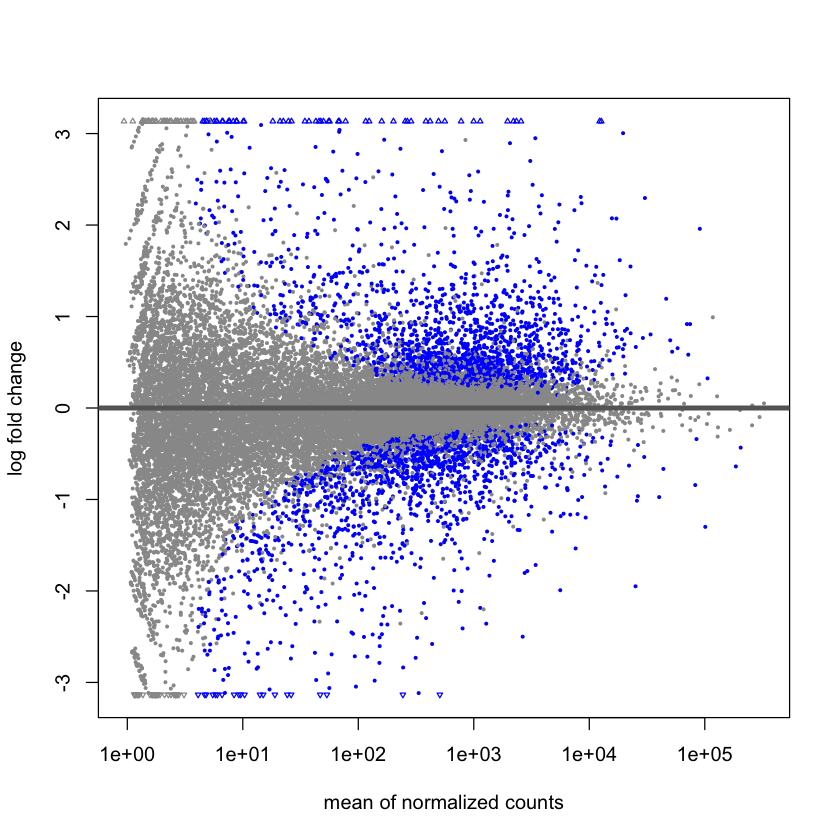

In [15]:
# visualisation! 

plotMA(res)